<a href="https://colab.research.google.com/github/LaTashkhat17/Telco-Customer-Churn-Prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn


In [ ]:
!unzip -q telco-customer-churn.zip

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Column Explanations

Here's a breakdown of each column in your Telco Customer Churn dataset:

-   **customerID**: A unique identifier for each customer.
-   **gender**: The customer's gender (Male or Female).
-   **SeniorCitizen**: Indicates whether the customer is a senior citizen (1 for Yes, 0 for No).
-   **Partner**: Indicates whether the customer has a partner (Yes or No).
-   **Dependents**: Indicates whether the customer has dependents (Yes or No).
-   **tenure**: The number of months the customer has stayed with the company.
-   **PhoneService**: Indicates whether the customer has phone service (Yes or No).
-   **MultipleLines**: Indicates whether the customer has multiple lines (Yes, No, or No phone service).
-   **InternetService**: The customer's internet service type (DSL, Fiber optic, or No).
-   **OnlineSecurity**: Indicates whether the customer has online security service (Yes, No, or No internet service).
-   **OnlineBackup**: Indicates whether the customer has online backup service (Yes, No, or No internet service).
-   **DeviceProtection**: Indicates whether the customer has device protection service (Yes, No, or No internet service).
-   **TechSupport**: Indicates whether the customer has tech support service (Yes, No, or No internet service).
-   **StreamingTV**: Indicates whether the customer has streaming TV service (Yes, No, or No internet service).
-   **StreamingMovies**: Indicates whether the customer has streaming movies service (Yes, No, or No internet service).
-   **Contract**: The type of contract the customer has (Month-to-month, One year, Two year).
-   **PaperlessBilling**: Indicates whether the customer uses paperless billing (Yes or No).
-   **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
-   **MonthlyCharges**: The amount charged to the customer monthly.
-   **TotalCharges**: The total amount charged to the customer over their tenure.
-   **Churn**: Indicates whether the customer churned (left the company) (1 for Yes, 0 for No).

In [ ]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No': 0})

In [ ]:
df['Churn'].value_counts(normalize=True)*100


,proportion
Churn,
0,73.463013
1,26.536987


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


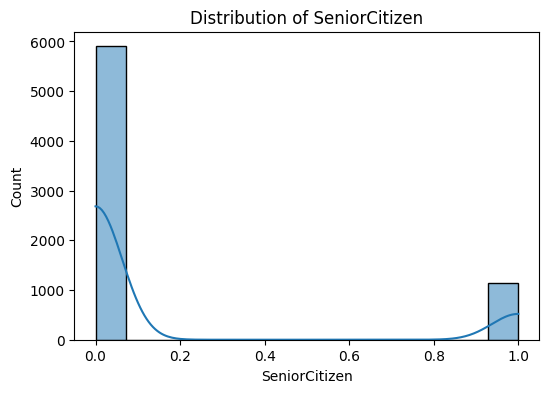

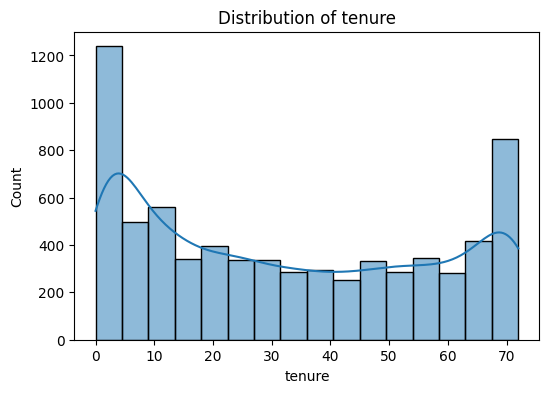

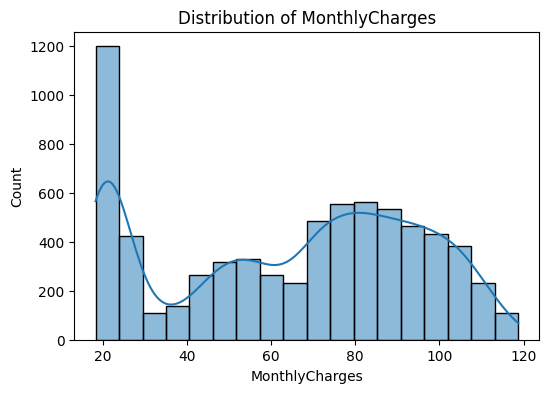

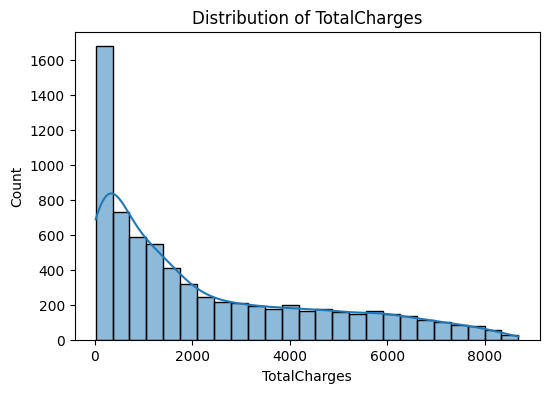

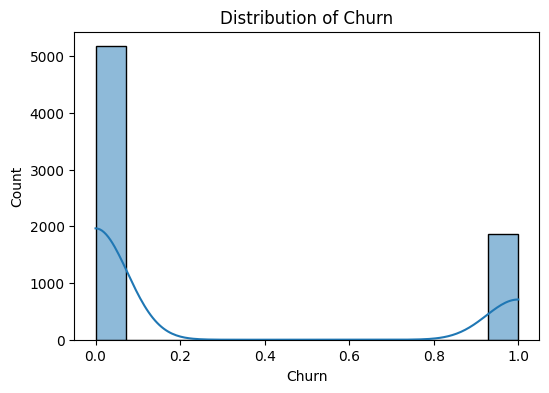

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


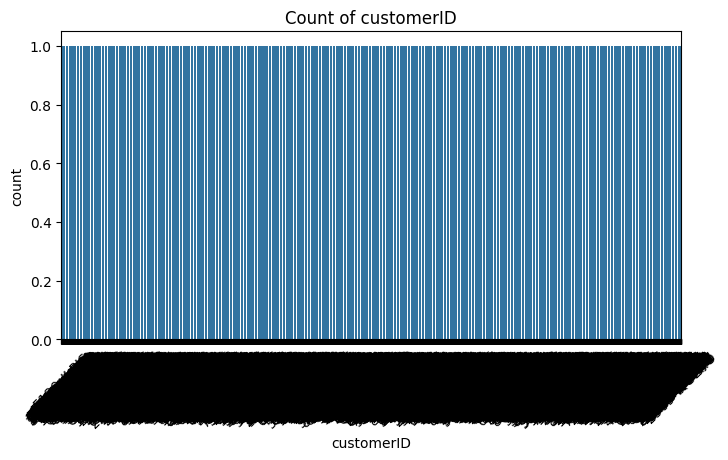

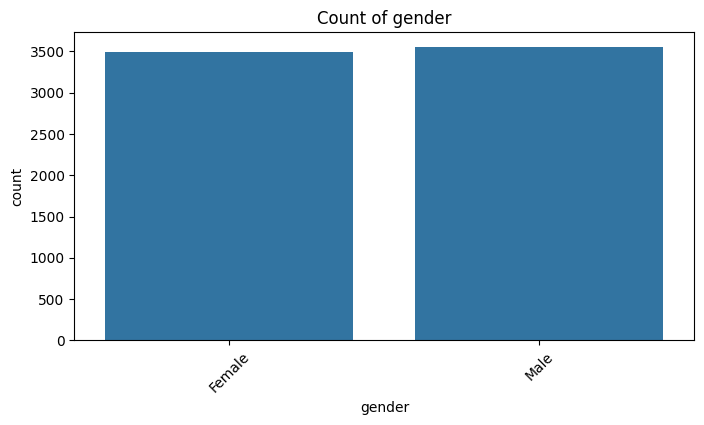

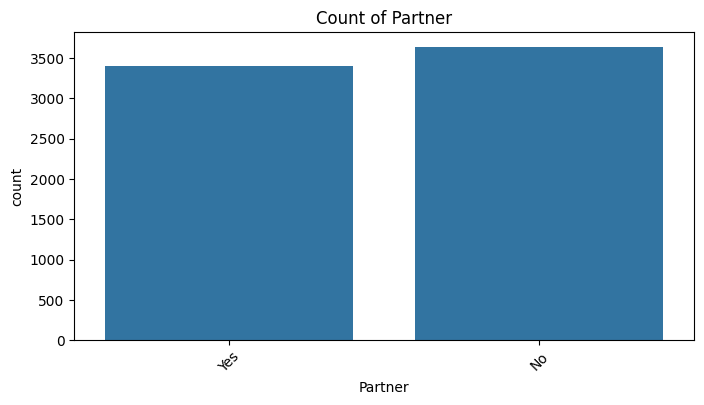

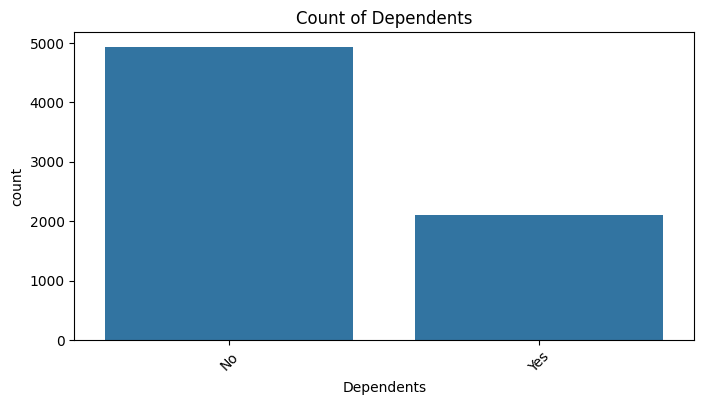

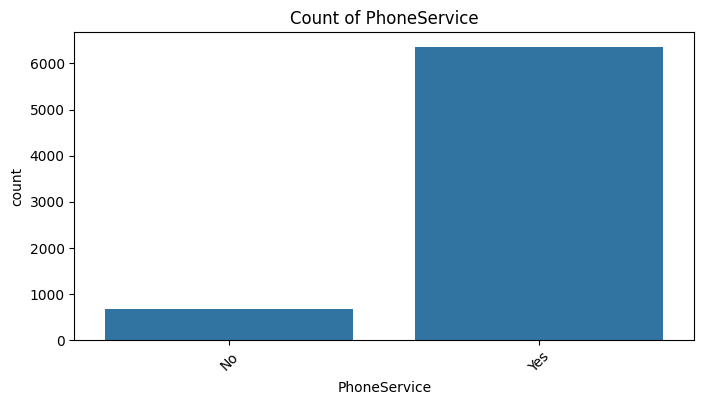

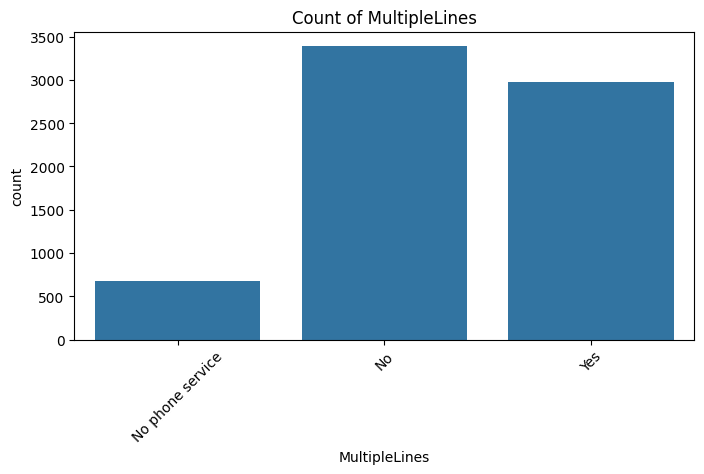

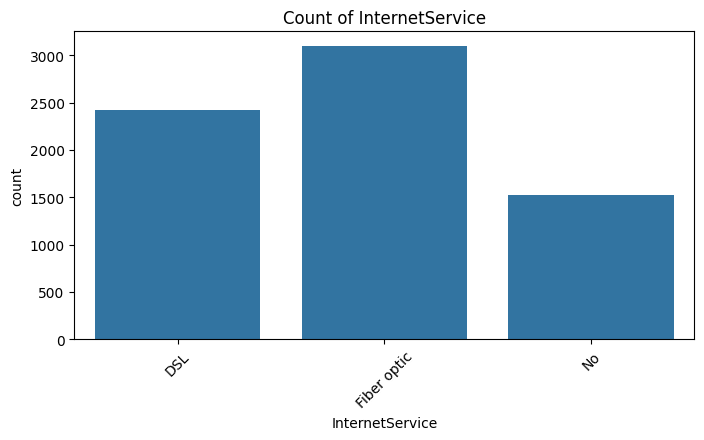

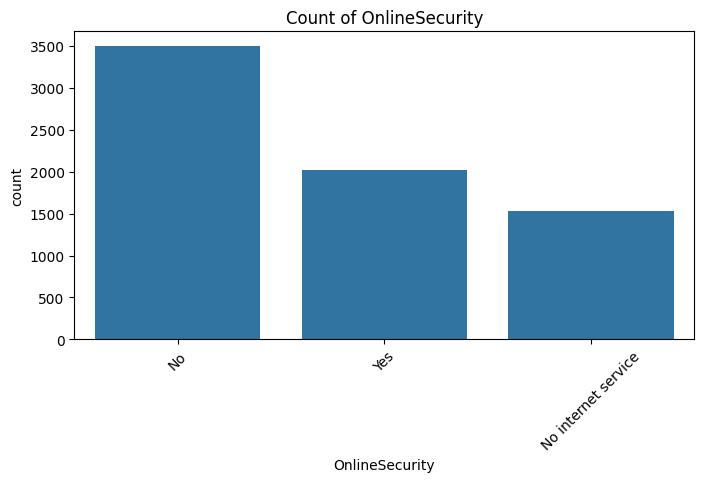

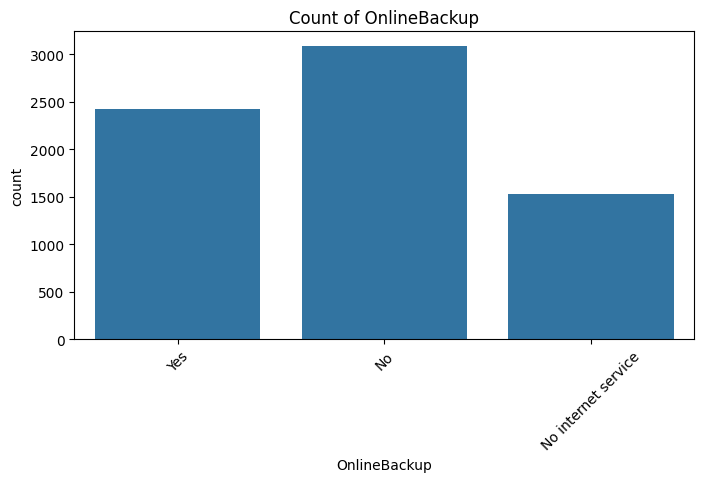

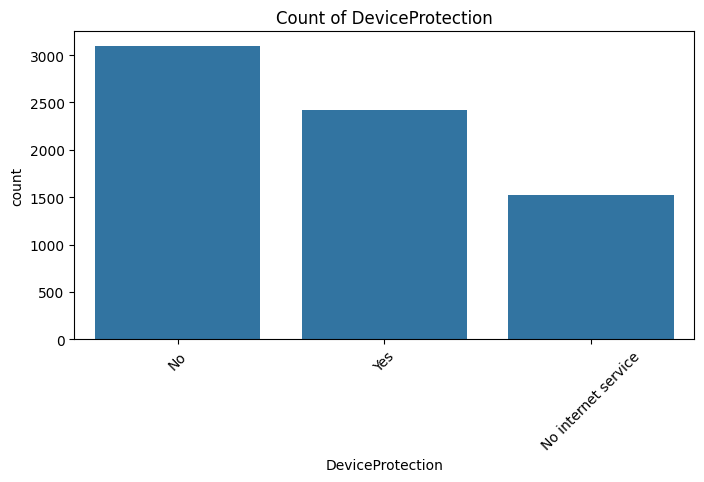

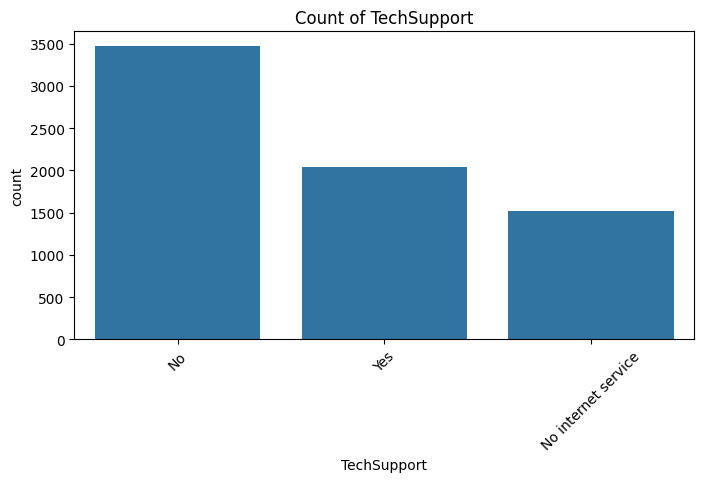

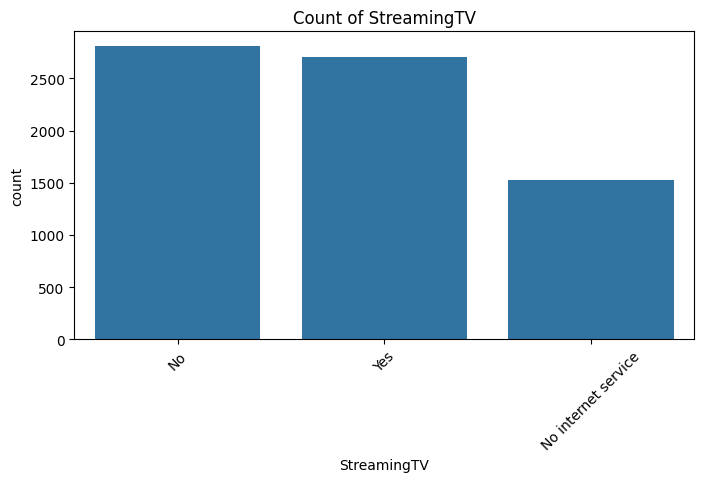

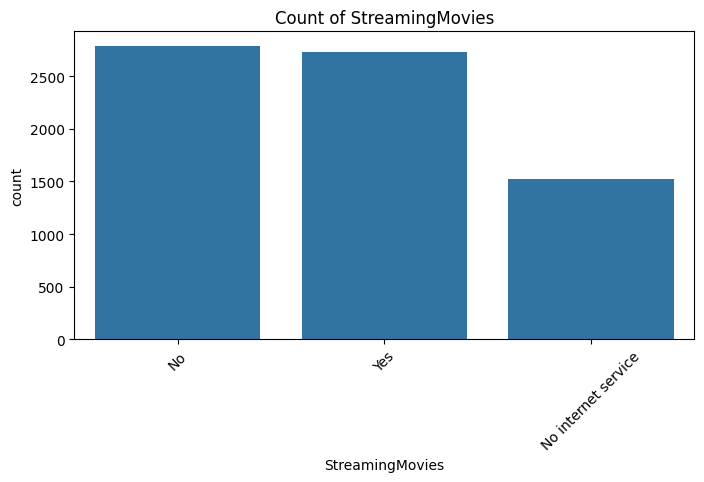

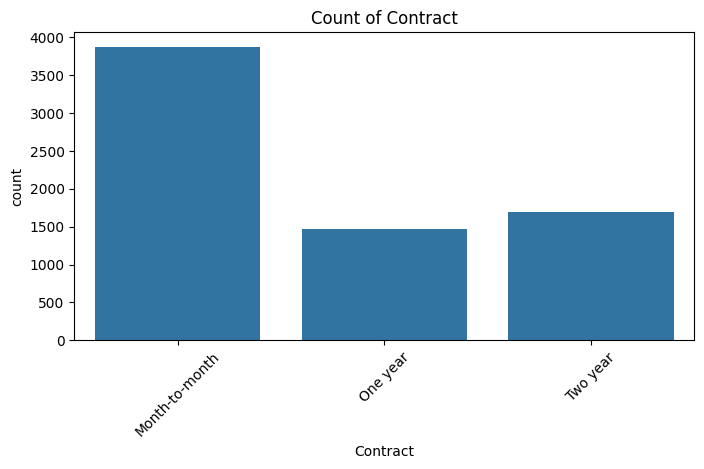

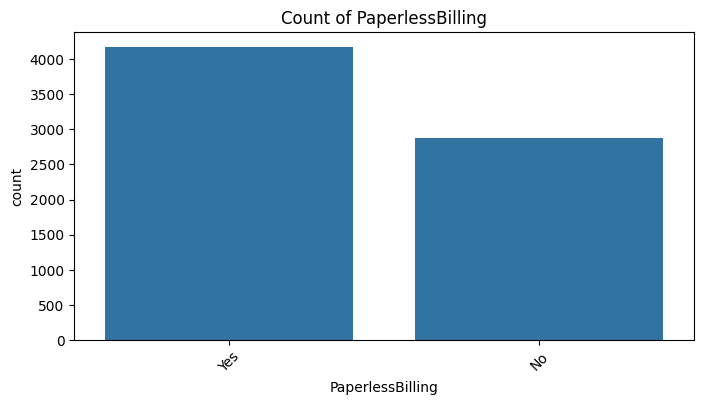

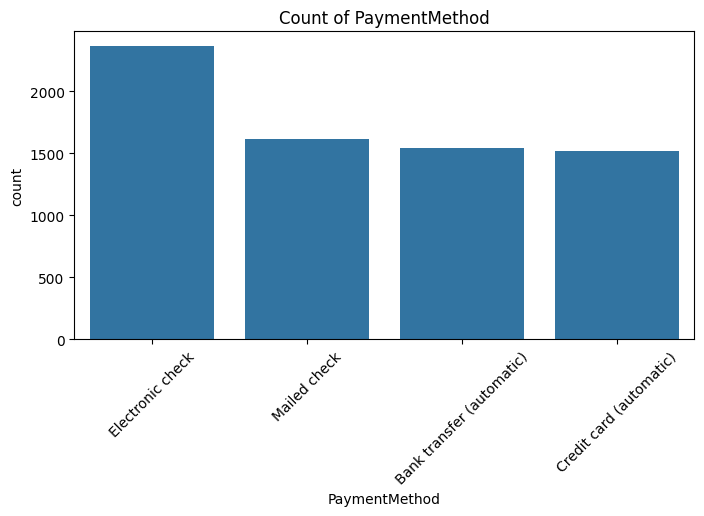

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()


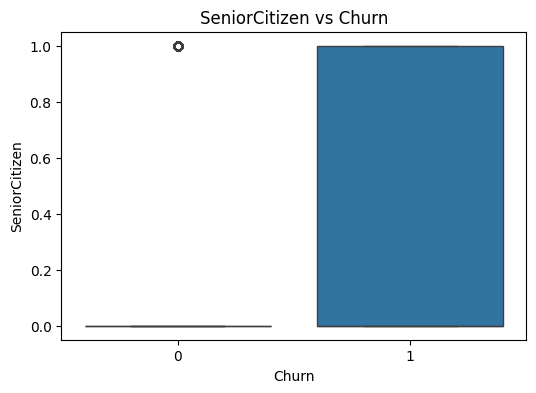

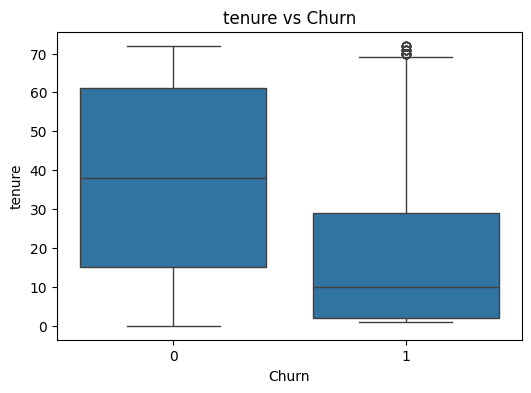

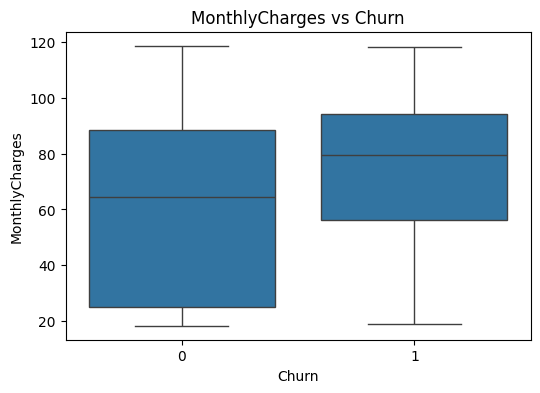

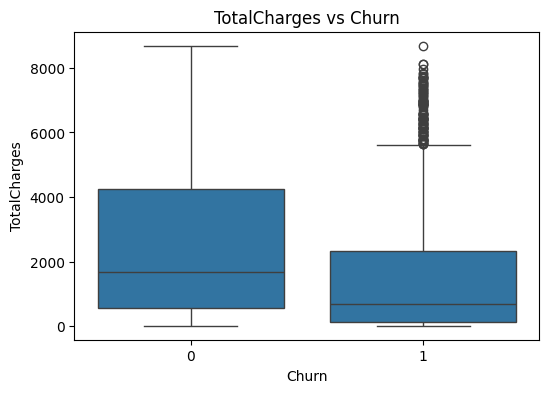

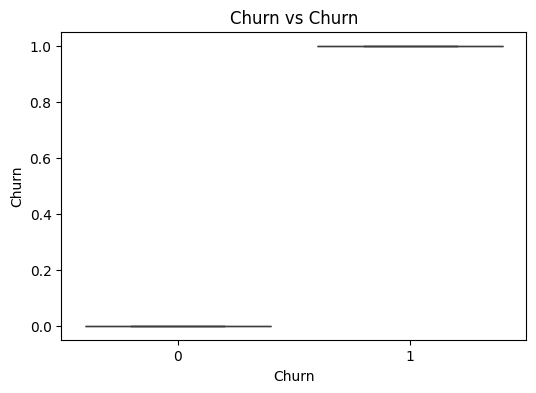

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


In [ ]:
df[num_cols].corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
MonthlyCharges,0.193356
SeniorCitizen,0.150889
TotalCharges,-0.199037
tenure,-0.352229


In [ ]:
df[num_cols].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.150889
tenure,0.016567,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.199037
Churn,0.150889,-0.352229,0.193356,-0.199037,1.000000


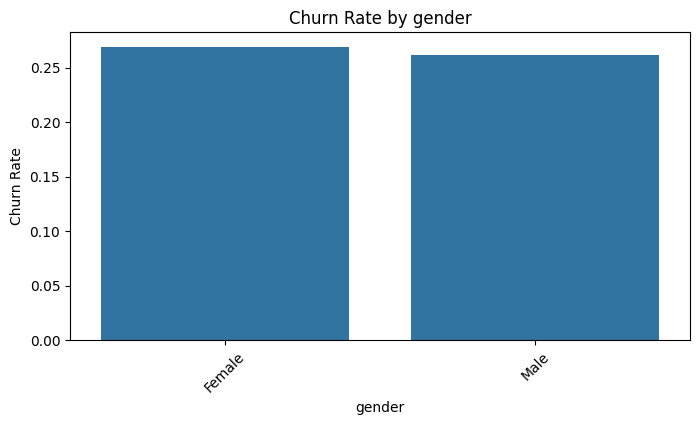

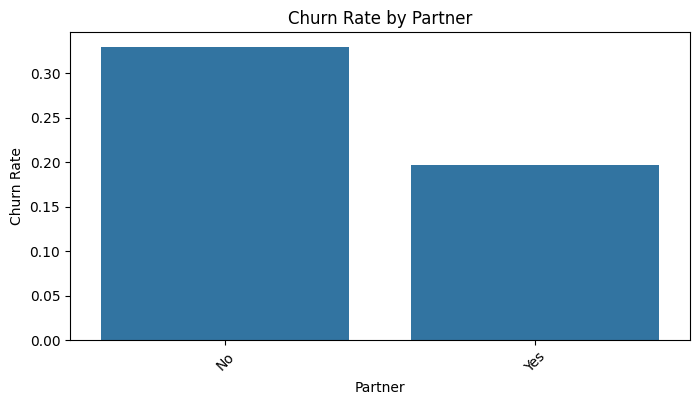

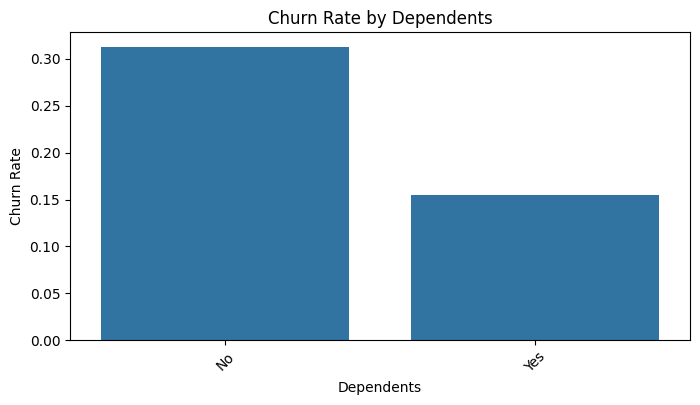

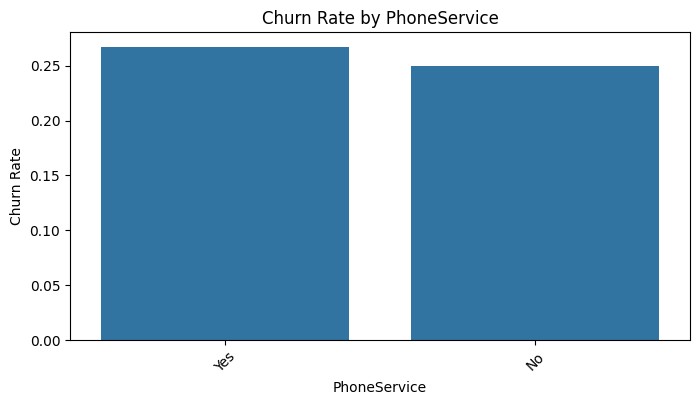

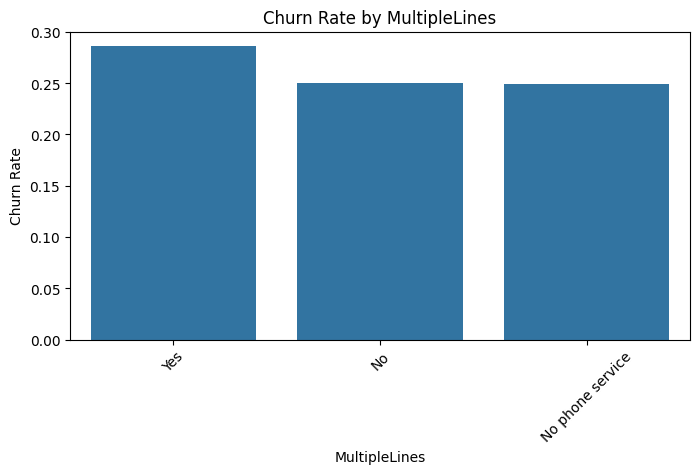

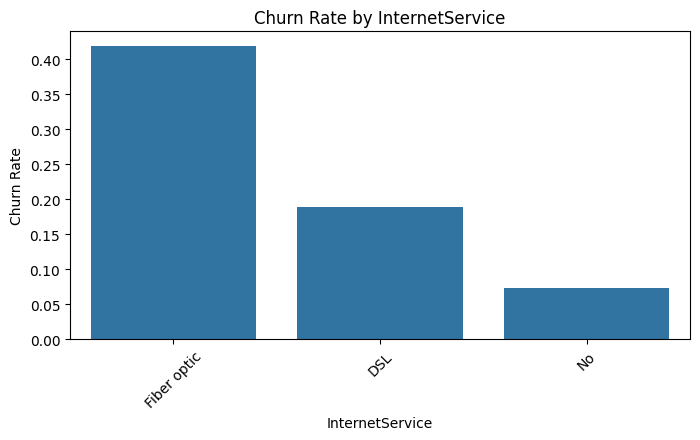

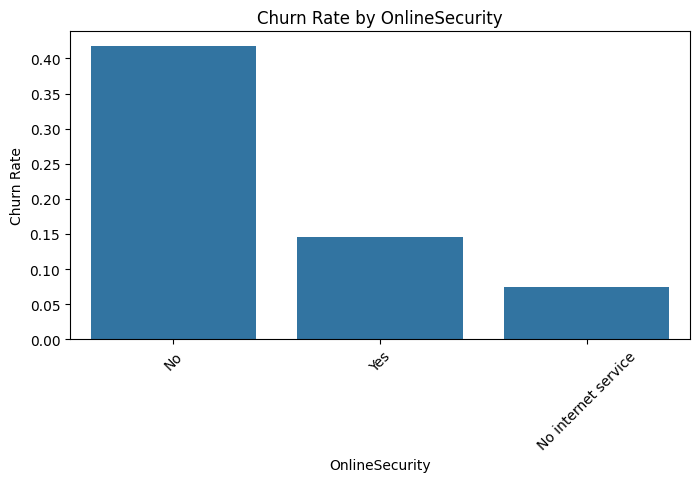

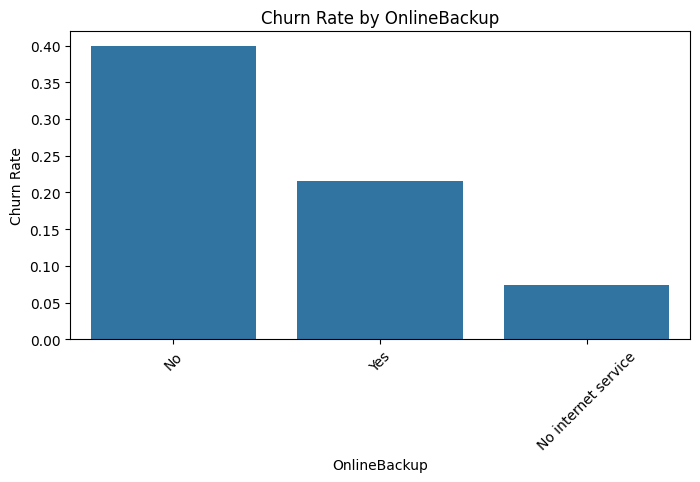

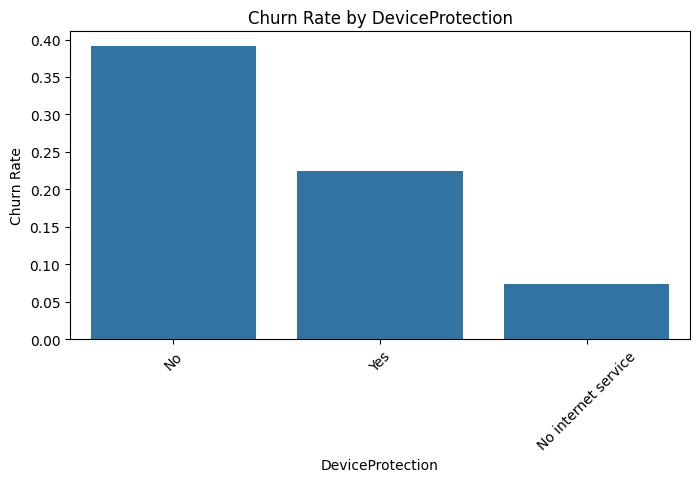

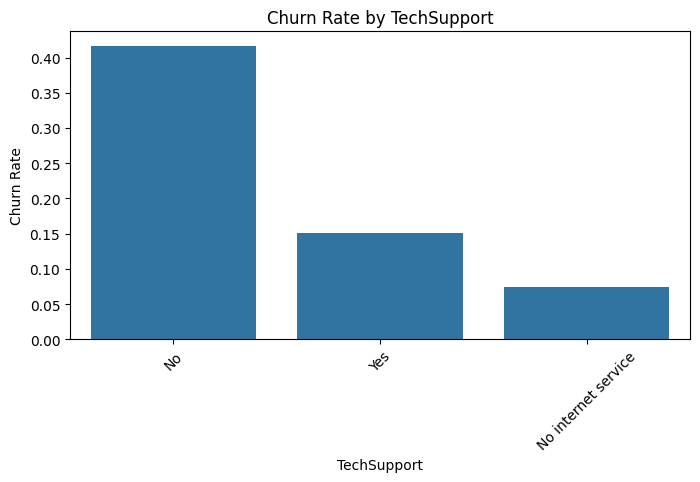

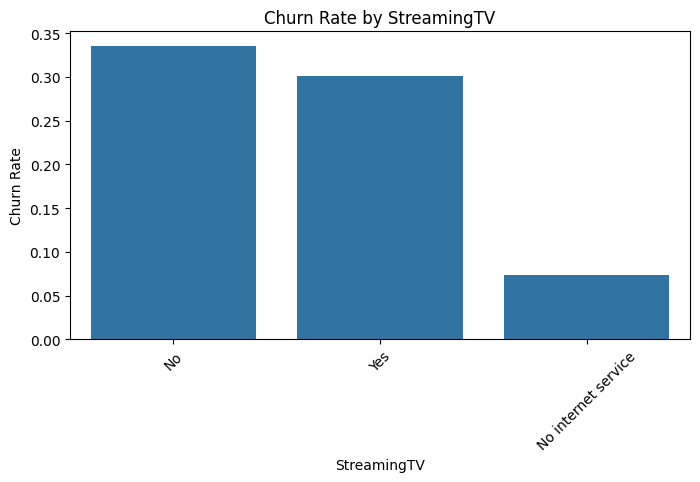

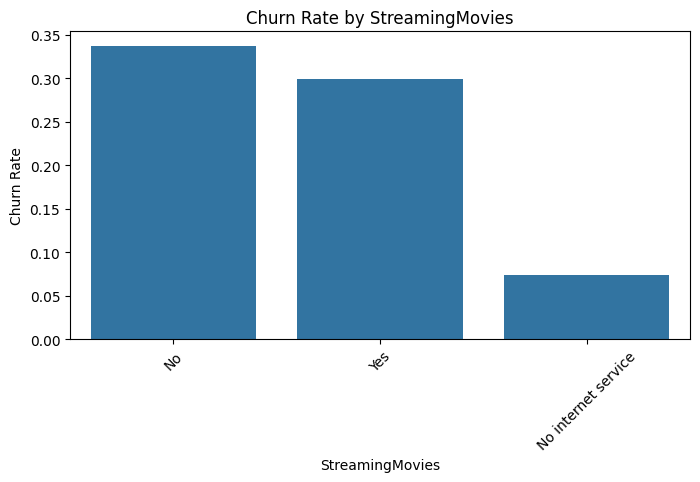

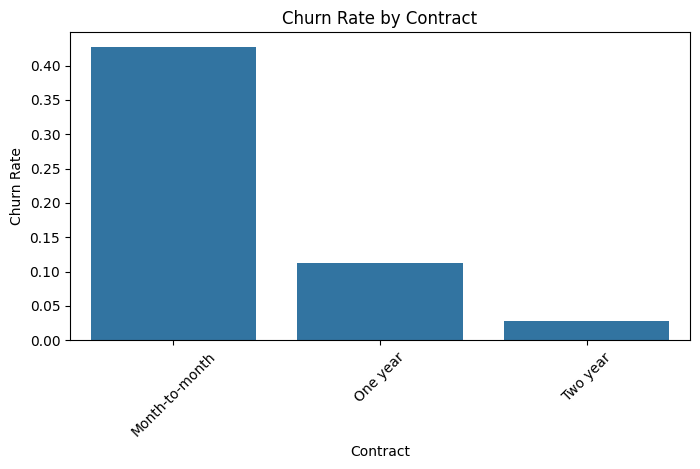

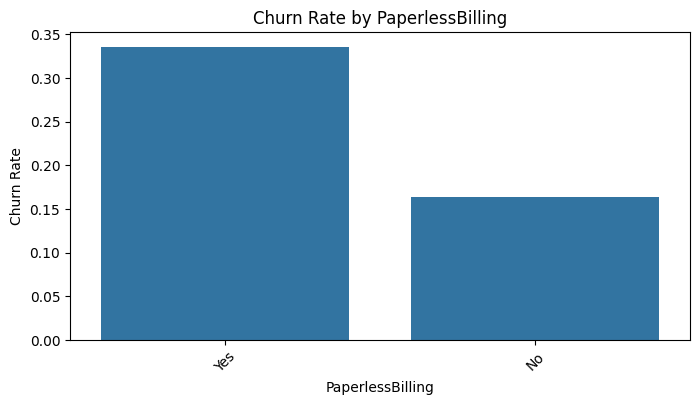

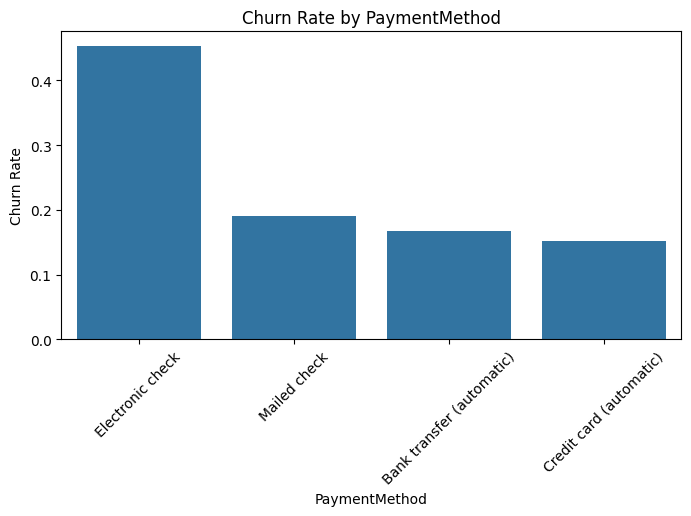

In [ ]:
for col in cat_cols:
    if(col != 'customerID'):
      churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
      plt.figure(figsize=(8,4))
      sns.barplot(x=churn_rate.index, y=churn_rate.values)
      plt.xticks(rotation=45)
      plt.ylabel('Churn Rate')
      plt.title(f'Churn Rate by {col}')
      plt.show()





In [ ]:
y = df['Churn']

X = df.drop(columns = ['Churn', 'customerID'])

In [ ]:
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


In [ ]:
from sklearn.preprocessing import StandardScaler

num_transformer = StandardScaler()


In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [68]:
# Apply preprocessing to training data
X_train_processed = preprocessor.fit_transform(X_train)

# Get feature names after encoding
num_features = num_cols
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(cat_cols)
all_features = list(num_features) + list(cat_features)

# Convert to DataFrame for easy visualization
X_train_df = pd.DataFrame(X_train_processed, columns=all_features)

# Show top 10 rows
X_train_df.head(10)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.441773,0.102371,-0.521976,-0.263289,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.441773,-0.711743,0.337478,-0.504814,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.441773,-0.793155,-0.809013,-0.751213,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.441773,-0.263980,0.284384,-0.173699,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,-0.441773,-1.281624,-0.676279,-0.990851,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.441773,1.364249,0.483485,1.270975,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
6,-0.441773,-1.281624,-1.497571,-1.001718,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,-0.441773,0.305900,-0.276418,0.034150,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,-0.441773,1.323543,-0.170230,0.661607,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
9,-0.441773,1.120015,0.518328,1.117722,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


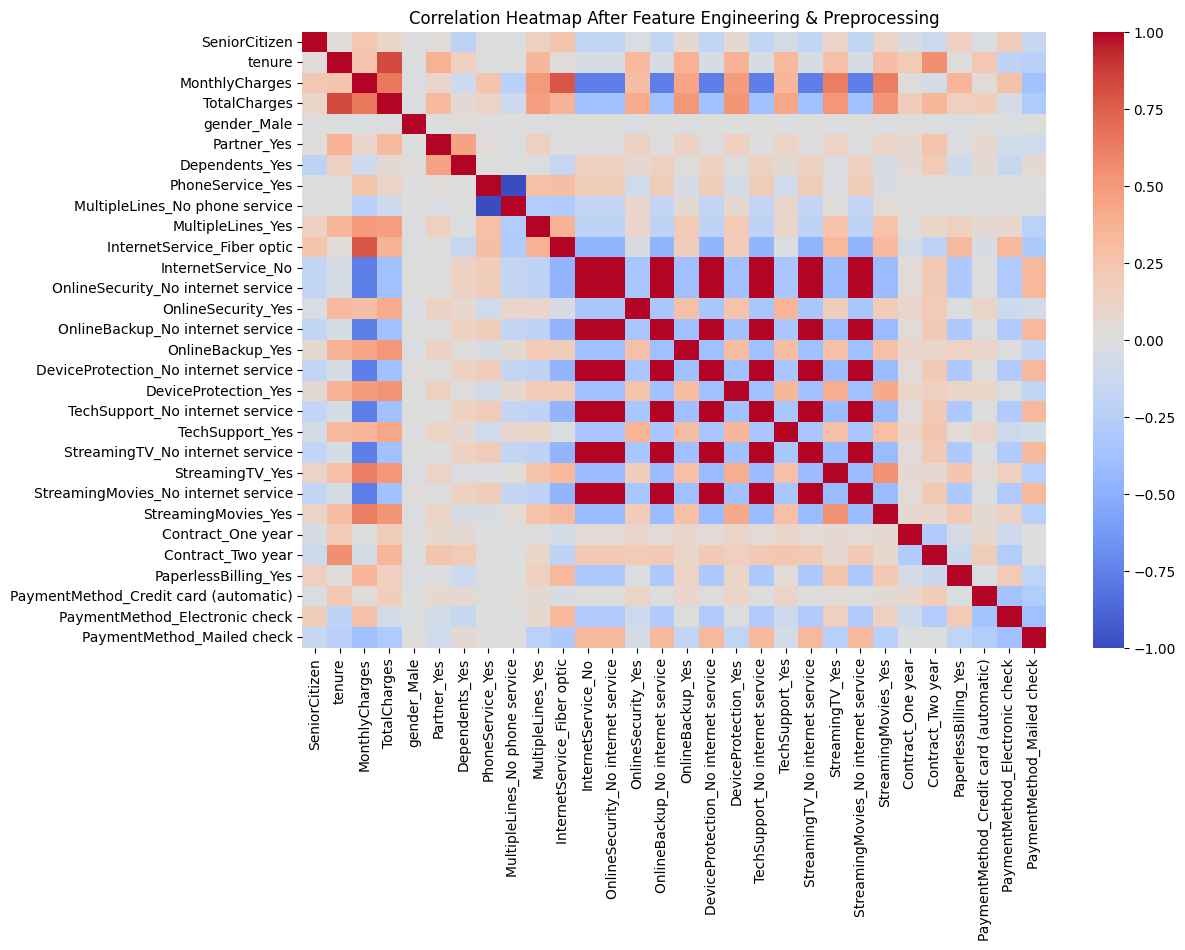

In [70]:

plt.figure(figsize=(12,8))
sns.heatmap(X_train_df.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap After Feature Engineering & Preprocessing")
plt.show()


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])


In [48]:
log_reg_balanced.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [49]:
from sklearn.metrics import recall_score, roc_auc_score, classification_report

y_pred = log_reg_balanced.predict(X_test)
y_prob = log_reg_balanced.predict_proba(X_test)[:, 1]

recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Recall:", recall)
print("ROC-AUC:", roc_auc)
print(classification_report(y_test, y_pred))


Recall: 0.7834224598930482
ROC-AUC: 0.8416905629181844
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=50,
        class_weight='balanced',
        random_state=42
    ))
])

dt_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_split=50,
                                        random_state=42))])

In [51]:
dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:, 1]

dt_recall = recall_score(y_test, dt_pred)
dt_roc = roc_auc_score(y_test, dt_prob)

dt_recall, dt_roc


(0.8074866310160428, np.float64(0.8302087369862304))

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=50,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=50, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [53]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

rf_recall = recall_score(y_test, rf_pred)
rf_roc = roc_auc_score(y_test, rf_prob)

rf_recall, rf_roc


(0.7807486631016043, np.float64(0.8452000826681134))

In [54]:
from xgboost import XGBClassifier

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        eval_metric='logloss',
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSuppo...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [55]:
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

xgb_recall = recall_score(y_test, xgb_pred)
xgb_roc = roc_auc_score(y_test, xgb_prob)

xgb_recall, xgb_roc


(0.7513368983957219, np.float64(0.8366684750316464))

In [56]:
from sklearn.svm import SVC

svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        C=1.0,
        gamma='scale',
        random_state=42
    ))
])

svm_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [57]:
svm_pred = svm_model.predict(X_test)
svm_prob = svm_model.predict_proba(X_test)[:, 1]

svm_recall = recall_score(y_test, svm_pred)
svm_roc = roc_auc_score(y_test, svm_prob)

svm_recall, svm_roc


(0.7807486631016043, np.float64(0.8250200211837041))

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(
        n_neighbors=15,
        weights='distance',
        metric='minkowski'
    ))
])

knn_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 KNeighborsClassifier(n_neighbors=15, weights='distance'))])

In [59]:
knn_pred = knn_model.predict(X_test)
knn_prob = knn_model.predict_proba(X_test)[:, 1]

knn_recall = recall_score(y_test, knn_pred)
knn_roc = roc_auc_score(y_test, knn_prob)

knn_recall, knn_roc


(0.5374331550802139, np.float64(0.8025678782712031))

In [60]:
results = pd.DataFrame({
    'Model': [
        'Logistic Regression (Balanced)',
        'Decision Tree',
        'Random Forest',
        'XGBoost',
        'SVM (RBF)',
        'KNN'
    ],
    'Recall': [
        recall,
        dt_recall,
        rf_recall,
        xgb_recall,
        svm_recall,
        knn_recall
    ],
    'ROC-AUC': [
        roc_auc,
        dt_roc,
        rf_roc,
        xgb_roc,
        svm_roc,
        knn_roc
    ]
})

results.sort_values(by='ROC-AUC', ascending=False)


,Model,Recall,ROC-AUC
2,Random Forest,0.780749,0.845200
0,Logistic Regression (Balanced),0.783422,0.841691
3,XGBoost,0.751337,0.836668
1,Decision Tree,0.807487,0.830209
4,SVM (RBF),0.780749,0.825020
5,KNN,0.537433,0.802568


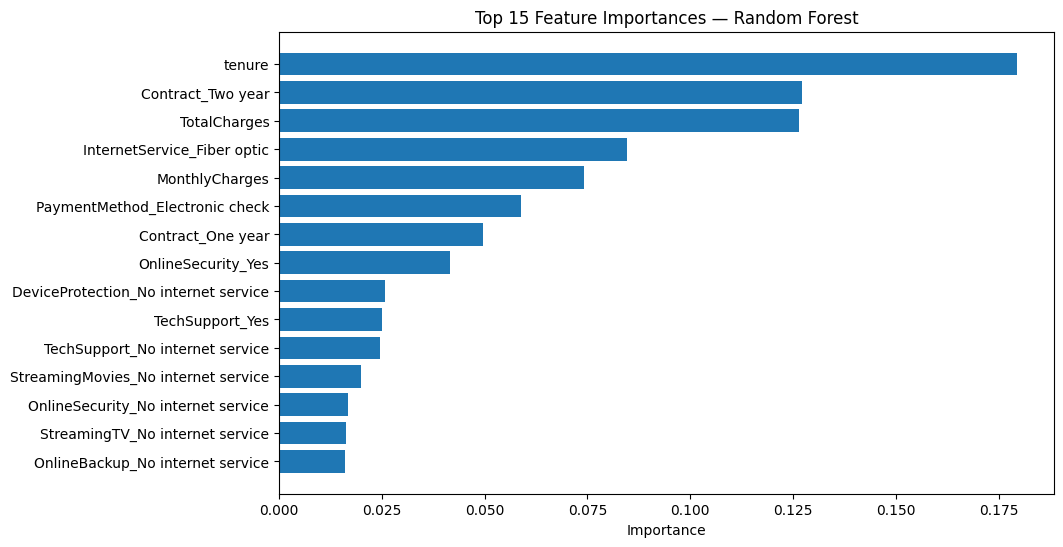

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the trained Random Forest model from the pipeline
rf_clf = rf_model.named_steps['model']

# Get feature names after preprocessing
num_features = num_cols
cat_features = rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols)
all_features = list(num_features) + list(cat_features)

# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'][:15][::-1], feat_importance_df['Importance'][:15][::-1])
plt.title("Top 15 Feature Importances — Random Forest")
plt.xlabel("Importance")
plt.show()


<Figure size 1000x600 with 0 Axes>

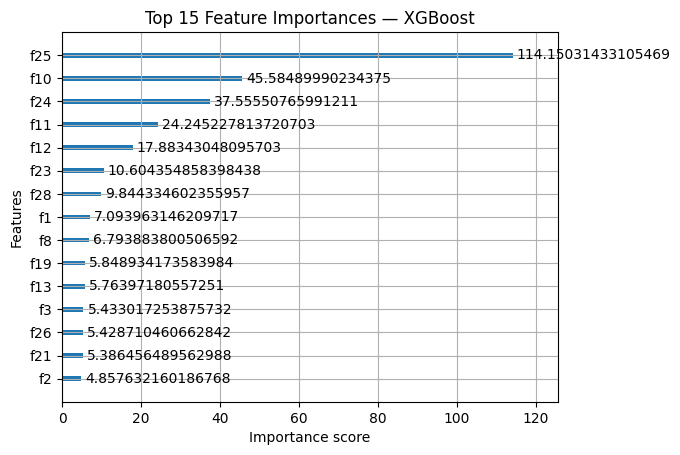

In [62]:
xgb_clf = xgb_model.named_steps['model']

# Plot feature importance
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_clf, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances — XGBoost")
plt.show()


In [63]:
pip install shap


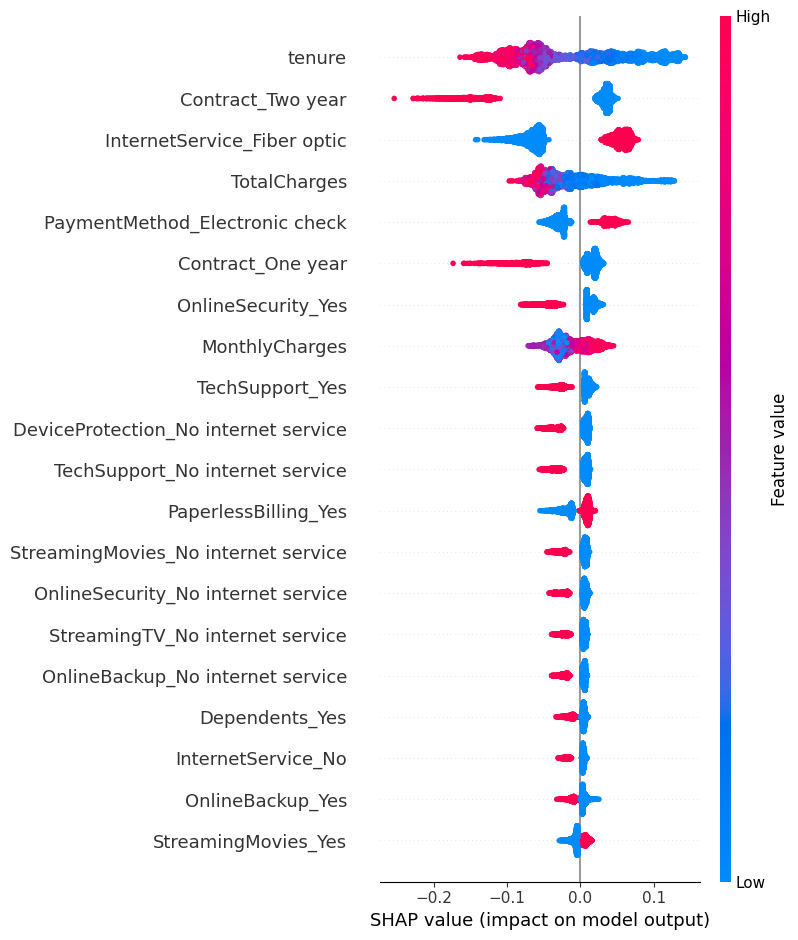

In [65]:
import shap

# Preprocessed training data
X_train_processed = rf_model.named_steps['preprocessor'].transform(X_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_train_processed)

# Summary plot
# The shap_values is a 3D array (num_samples, num_features, num_classes) for this model.
# To get the SHAP values for the positive class (class 1), we need to slice across the last dimension.
shap.summary_plot(shap_values[:, :, 1], X_train_processed, feature_names=all_features)


In [ ]:
X_train_processed_xgb = xgb_model.named_steps['preprocessor'].transform(X_train)

explainer_xgb = shap.TreeExplainer(xgb_clf)
shap_values_xgb = explainer_xgb.shap_values(X_train_processed_xgb)

shap.summary_plot(shap_values_xgb, X_train_processed_xgb, feature_names=all_features)
